In [2]:
import matplotlib.pyplot as plt
import matplotlib as mpl
mpl.style.use('ggplot')
%matplotlib inline
import pandas as pd
import pymc3 as pm
import numpy as np
from scenario import Scenario

In [3]:
data = pd.read_csv('COT_details.csv', index_col=[0])
data.sort_index(inplace=True)
columns = data.columns
columns

Index(['Light Sweet Money Managers (R1)', 'Light Sweet Swap Dealers (R1)',
       'Light Sweet Manufacturers (R1)', 'Light Sweet Others (R1)',
       'Light Sweet (R2)', 'CFFDQSWL Index - Mid Price (R1)',
       'CFFDQSWS Index - Mid Price (R1)', 'CFFDQSWD Index - Mid Price (R1)',
       'CFFDQPML Index - Mid Price (R1)', 'CFFDQPMS Index - Mid Price (R1)',
       'CFFDQMML Index - Mid Price (R1)', 'CFFDQMMS Index - Mid Price (R1)',
       'CFFDQMMD Index - Mid Price (R1)', 'CFFDQORL Index - Mid Price (R1)',
       'CFFDQORS Index - Mid Price (R1)', 'CFFDQORD Index - Mid Price (R1)',
       'SPX Index - Last Price (L1)', 'GC1 Comdty - Last Price (L1)',
       'DXY Curncy - Last Price (R4)', 'USGG2YR Index - Last Price (R3)'],
      dtype='object')

In [4]:
with pm.Model() as model:
    scenario = Scenario(
                    pd.concat([data.iloc[:,:5], data.iloc[:,-4]], 1),
                    t = 30
            )

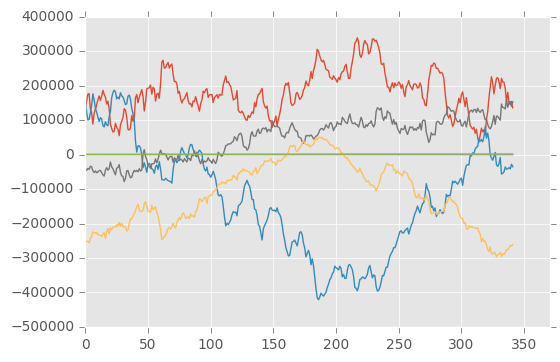

In [5]:
scenario.initial_data.plot(legend=False)

In [20]:
trace_met = None

In [ ]:
with model:
    step = pm.NUTS()
    trace_met = pm.sample(10000, step=step, trace=trace_met, chain=40)


  0%|          | 12/10000 [00:07<3:08:05,  1.13s/it]

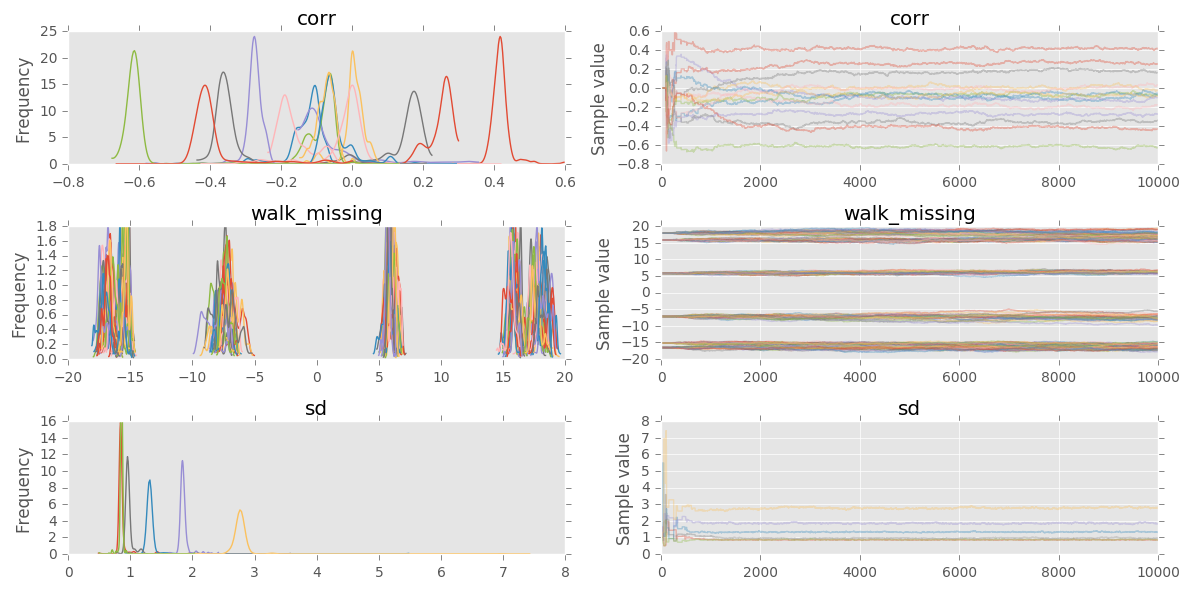

In [7]:
pm.traceplot(trace_met);

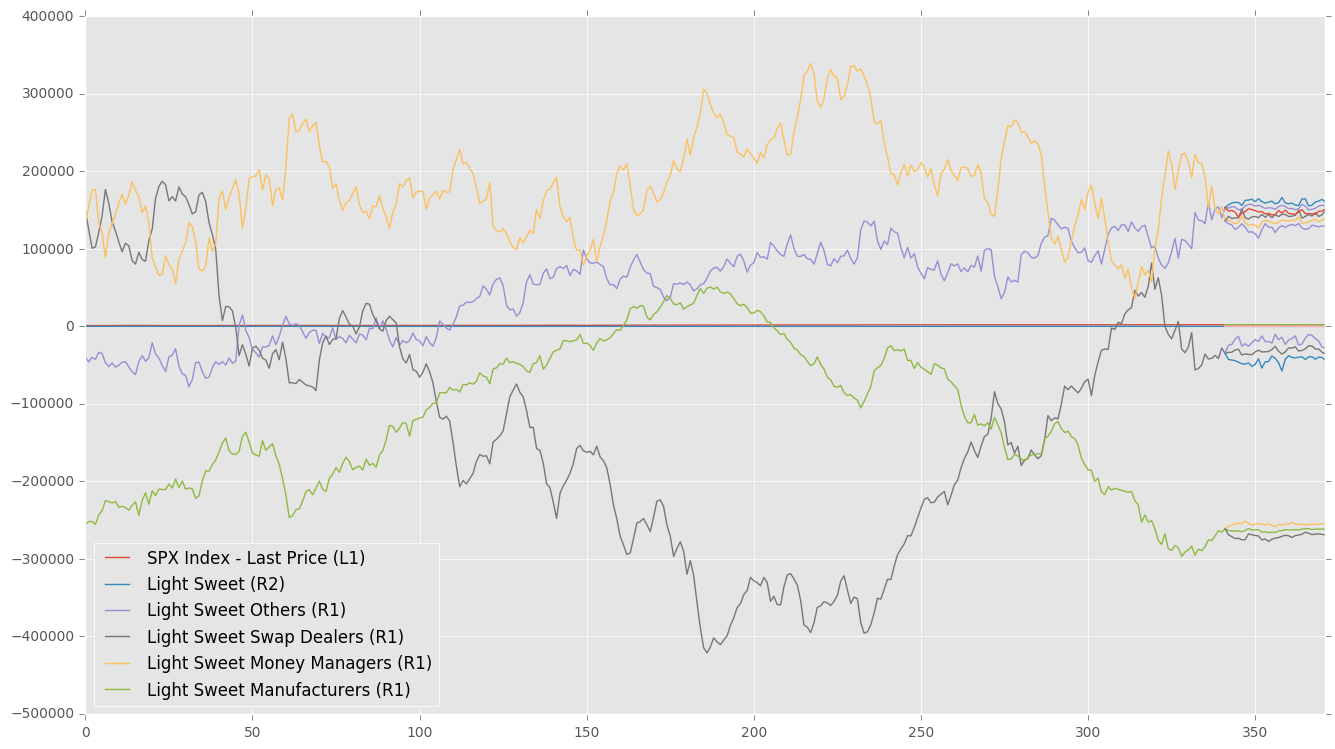

In [8]:
res = scenario.trace_scenario(trace_met, 3)
fig, ax = plt.subplots(figsize=(16, 9))
res['mean'].plot(ax=ax)
res['upper'][-31:].plot(ax=ax, legend=False)
res['lower'][-31:].plot(ax=ax, legend=False)